# Read me


The [training](https://drive.google.com/file/d/1tfo6qm8zB5Eb7TY8WQGey-SqwBiC-3uO/view?usp=sharing) and [test](https://drive.google.com/file/d/1--yMo6lHVrkU9iqXUjLIJpKLYaz7QfLF/view?usp=sharing) data were downloaded from the [Zoo Galaxy](https://data.galaxyzoo.org/#section-21) platform, corresponding to Galaxy Zoo 2 ([images_gz2.zip](https://zenodo.org/records/3565489#.Y3vFKS-l0eY)).  

These data are stored in "[.pkl](https://drive.google.com/drive/folders/1XalRlt11sYmU11op2z3xPnVsRt8Pz0VM?usp=drive_link)" format instead of the original ".jpg" format to facilitate handling. The dataset consists of 10,000 training images and 5,000 test images. The information is reduced to 75 pixels per image, arranged in a 5x5 pixel grid with three color channels. To visualize the galaxy, it is necessary to reconstruct the image.

# Set up

## Packages

In [ ]:
# Mount Google Drive to access and store files
# Comment out this cell if running the script locally

from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Force remount to ensure access

Mounted at /content/drive


In [ ]:
# Standard libraries for file handling, data manipulation, and performance tracking
import os                # For managing file and directory operations
import io                # For byte stream handling (e.g., reading and writing in-memory files)
import math              # For mathematical operations like square roots, logarithms, etc.
import joblib            # For saving and loading machine learning models
import requests          # For making HTTP requests, like downloading files from the internet
import numpy as np       # For numerical operations and array manipulation
import pandas as pd      # For data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # For creating and displaying plots and visualizations


In [ ]:
# Import TensorFlow and Keras libraries for deep learning tasks
import tensorflow as tf        # TensorFlow for building and training machine learning models
from tensorflow import keras    # Keras for high-level neural networks API, built on TensorFlow

# Import machine learning preprocessing tools
from sklearn.preprocessing import LabelEncoder  # For converting categorical labels into numerical format

# Import tools for model validation and splitting
from sklearn.model_selection import StratifiedKFold  # For stratified K-fold cross-validation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# Import Keras callbacks for model training management
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau  # Callbacks for training control


## Funtions

In [ ]:
def load_logdata(data='train'):
    """
    Downloads and loads preprocessed training or testing log data from Google Drive.

    Parameters:
    - data (str): Specifies which log data to load ('train' or 'test').

    Returns:
    - DATA (numpy array or None): The loaded log data if successful, otherwise None.
    """

    # Define Google Drive file IDs for train and test log data
    if data.lower() == 'train':
        file_id = '1wDuS7VDzPIFEb7w_L6q1oe85ONsfEntC'  # File ID for log data train

    elif data.lower() == 'test':
        file_id = '1wAKlz1x5GZ0HbJYL90KcgVJKuDW2ZfIv'  # File ID for log data test

    else:
        print('Error: Type of data invalid')  # Handle incorrect input
        return None

    # Construct the download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Request file from Google Drive
    respuesta = requests.get(url)

    # Load the file as a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the dataset using joblib
    DATA = pd.read_csv(file_stream)

    # Confirm successful data loading
    print(f'{data.lower()} data loaded\nShape: {DATA.shape}')

    return DATA

def load_data(data='train'):
    """
    Downloads and loads preprocessed training or testing data from Google Drive.

    Parameters:
    - data (str): Specifies which dataset to load ('train' or 'test').

    Returns:
    - DATA (numpy array or None): The loaded dataset if successful, otherwise None.
    """

    # Define Google Drive file IDs for train and test datasets
    if data.lower() == 'train':
        file_id = '1-8JHObeY7kaU0qLt0p7WDFRJf6A6iYFN'  # File ID for training data

    elif data.lower() == 'test':
        file_id = '1bdjlyKp02O04uGkixX1E4mQMkUjvWRbL'  # File ID for test data

    else:
        print('Error: Type of data invalid')  # Handle incorrect input
        return None

    # Construct the download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Request file from Google Drive
    respuesta = requests.get(url)

    # Load the file as a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the dataset using joblib
    DATA = joblib.load(file_stream)

    # Confirm successful data loading
    print(f'{data.lower()} data loaded\nShape: {DATA.shape}')

    return DATA

def load_model(model='ipca'):
    """
    Downloads and loads a machine learning model from Google Drive.

    Parameters:
    - model (str): Specifies which model to load ('ipca' or 'scaler').

    Returns:
    - DATA (object or None): The loaded model object if successful, otherwise None.
    """

    # Define Google Drive file IDs for different models
    if model.lower() == 'ipca':
        file_id = '1s_reCv_xE5jQ_pKUtoPDsH6qPRJId_OL'  # File ID for the Incremental PCA model

    elif model.lower() == 'scaler':
        file_id = '1kl2dynGnyYr70_ChOOzQT3z1t3n7RB9w'  # File ID for the StandardScaler model

    else:
        print('Error: Invalid model type specified')  # Handle incorrect input
        return None

    # Construct the Google Drive download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Send a request to download the model file
    respuesta = requests.get(url)

    # Convert the downloaded content into a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the model using joblib
    MODEL = joblib.load(file_stream)

    # Confirm successful model loading
    print(f'Model loaded: {MODEL}')

    return MODEL

def single_reconverter(data):
    """
    Takes a single PCA-transformed data point, reverses the PCA and scaling transformations,
    and normalizes it before reshaping it into an image.

    Parameters:
    - data (numpy array): A single data point in PCA-reduced form.

    Returns:
    - norm_centroides (numpy array): Reconstructed image (174x174x3).
    """
    data = data.reshape(1, -1)  # Ensure data is a 2D array
    centroides = scaler.inverse_transform(data)  # Reverse standard scaling
    centroides = ipca.inverse_transform(centroides)  # Reverse PCA transformation
    norm_centroides = normalized(centroides)  # Normalize pixel values
    norm_centroides = norm_centroides.reshape(174, 174, 3)  # Reshape into an image
    return norm_centroides


def reconverter(data):
    """
    Reconstructs multiple PCA-reduced data points back into images.

    Parameters:
    - data (numpy array): Multiple PCA-transformed data points.

    Returns:
    - norm_centroides (numpy array): Reconstructed images with normalized pixel values.
    """
    centroides = scaler.inverse_transform(data)  # Reverse scaling
    centroides = ipca.inverse_transform(centroides)  # Reverse PCA
    norm_centroides = normalized(centroides)  # Normalize pixel values
    return norm_centroides


def normalized(data):
    """
    Normalizes data to the range [0,1] using min-max scaling.

    Parameters:
    - data (numpy array): Input data.

    Returns:
    - norm (numpy array): Normalized data.
    """
    norm = (data - data.min()) / (data.max() - data.min())  # Min-max normalization
    return norm

## Directories

In [ ]:
### Drive roots ####

root_train ='/content/drive/MyDrive/Practicas_Profesionales/Data/PKLs/train_data.pkl'
root_test ='/content/drive/MyDrive/Practicas_Profesionales/Data/PKLs/test_data.pkl'

root_ipca = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Pre-processing/reduce_dimensions.pkl'
root_scaler = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Pre-processing/scaler.pkl'

root_log_data = '/content/drive/MyDrive/Practicas_Profesionales/Data/Log_data/'

root_CNN = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/CNN/'
root_result = '/content/drive/MyDrive/Practicas_Profesionales/Results/CNN/'

In [ ]:
# ### Local roots ####

# root_train ='/home/tonathiu/Fisica/Practicas_Profesionales/Data/train_data.pkl'
# root_test ='/home/tonathiu/Fisica/Practicas_Profesionales/Data/test_data.pkl'

# root_ipca = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/Pre-processing/reduce_dimensions.pkl'
# root_scaler = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/Pre-processing/scaler.pkl'

# root_CNN = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/'
# root_result = '/home/tonathiu/Fisica/Practicas_Profesionales/Results/CNN/'

## Load Models

In [ ]:
# Load models from drive

ipca = load_model('ipca')
scaler = load_model('scaler')

Model loaded: IncrementalPCA(batch_size=100, n_components=75)
Model loaded: StandardScaler()


In [ ]:
# ## Run if you have file of ipca & scaler on your computer/Drive

# ipca = joblib.load(root_ipca)
# scaler = joblib.load(root_scaler)

## Load Log Data

In [ ]:
# Load the training and testing log data from Google Drive
log_data_train = load_logdata('train')  # Load the log data for the training set

train data loaded
Shape: (10000, 3)
test data loaded
Shape: (10000, 3)


# Train Dataset

In [ ]:
# Load dataset from drive
train_data = load_data('train')

train data loaded
Shape: (10000, 75)
test data loaded
Shape: (10000, 75)


In [ ]:
# Initialize the LabelEncoder to convert categorical labels into numerical values
encoder = LabelEncoder()

# Fit the encoder on the 'gz2_class' column and transform the labels into numerical format
labels = encoder.fit_transform(log_data_train['gz2_class'])

# Add the encoded labels as a new column 'labels' in the log_data_train DataFrame
log_data_train['labels'] = labels


In [ ]:
# Define the total number of available training samples
total_data = len(train_data)

# Define how many samples we want to use from the total
data_to_use = 5_000

# Calculate the proportion of the dataset to use (alpha)
alpha = data_to_use / total_data

# Print the proportion and the actual number of images to use
print(f'Percent of data to use: {alpha}\nSize data to use: {int(total_data * alpha)} images')


Percent of data to use: 0.5
Size data to use: 5000 images


In [ ]:
# Subsample the training data and labels using stratified sampling
X_data,_,Y_data,_ = train_test_split(train_data, labels, test_size=alpha,stratify=labels, random_state = 31)

# Determine the number of unique classes in the sampled labels
classes = len(np.unique(Y_data))

In [ ]:
# Reconstruct the first sample in X_data back to its original image format
sample_data = single_reconverter(X_data[0])

# Determine the number of color channels (3 for RGB)
colors_canals = sample_data.shape[-1]

# Get the height/width of the image (assuming square shape)
size_img = sample_data.shape[0]

In [ ]:
sample_data.shape

(174, 174, 3)

# CNN

In [ ]:
def create_model(input_shape, num_classes):
    """
    Builds and compiles a Convolutional Neural Network (CNN) model for multi-class classification.

    Parameters:
    - input_shape (tuple): Shape of the input images (height, width, channels).
    - num_classes (int): Number of output classes for classification.

    Returns:
    - modelCNN (tf.keras.Model): Compiled CNN model.
    """

    modelCNN = keras.Sequential()

    # Input layer with specified image shape
    modelCNN.add(keras.layers.Input(shape=input_shape))

    # First convolutional block
    modelCNN.add(keras.layers.Conv2D(64, (6, 6), padding='same', activation='relu'))
    modelCNN.add(keras.layers.MaxPooling2D((3, 3)))

    # Second convolutional block
    modelCNN.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    modelCNN.add(keras.layers.MaxPooling2D((3, 3)))

    # Third convolutional layer (no pooling)
    modelCNN.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))

    # Flatten the output from the convolutional layers
    modelCNN.add(keras.layers.Flatten())

    # Fully connected (dense) layer with dropout for regularization
    modelCNN.add(keras.layers.Dense(64, activation='relu'))
    modelCNN.add(keras.layers.Dropout(0.5))

    # Output layer with softmax activation for multi-class classification
    modelCNN.add(keras.layers.Dense(num_classes, activation='softmax'))

    # Compile the model with Adam optimizer and sparse categorical crossentropy
    modelCNN.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return modelCNN

# Display the model architecture
create_model(sample_data.shape, classes).summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 174, 174, 64)        │           6,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 58, 58, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 587,500 (2.24 MB)

 Trainable params: 587,500 (2.24 MB)

 Non-trainable params: 0 (0.00 B)

# Train with out k-fold

In [ ]:
# Split the sampled dataset into training and validation sets using stratified sampling
x_train,x_vali,y_train,y_vali = train_test_split(X_data,Y_data,test_size=0.25,stratify=Y_data,random_state=2731)

# Reconstruct transformed training data into image format
x_train = reconverter(x_train)
x_train = x_train.reshape(-1, size_img, size_img, colors_canals)

# Reconstruct and reshape the validation data
x_vali = reconverter(x_vali)
x_vali = x_vali.reshape(-1, size_img, size_img, colors_canals)

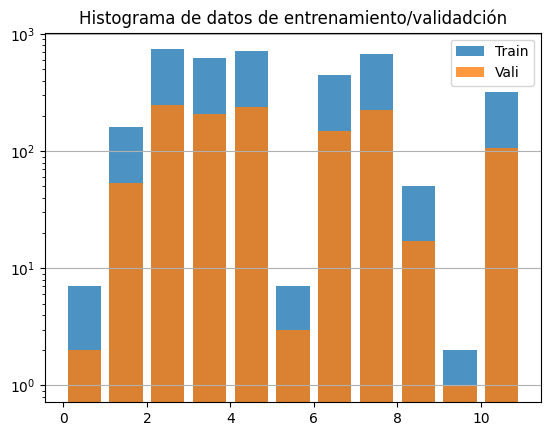

In [ ]:
# Plot a histogram to visualize the class distribution in training and validation sets

plt.figure()
plt.title('Histograma de datos de entrenamiento/validación')

# Use the unique class labels as bin edges for consistent comparison
bins = np.unique(y_train)

# Set y-axis to logarithmic scale to better visualize differences in frequency
plt.semilogy()

# Plot the histogram for training data
plt.hist(y_train, bins=bins, rwidth=0.8, label='Train', alpha=0.8)

# Plot the histogram for validation data
plt.hist(y_vali, bins=bins, rwidth=0.8, label='Vali', alpha=0.8)

# Add legend and grid for readability
plt.legend()
plt.grid(axis='y')

# Show the histogram
plt.show()

In [ ]:
# Define training callbacks to improve performance and prevent overfitting

# Stop training if validation loss doesn't improve for 5 epochs,
# and restore the best weights encountered during training
early_stopping = EarlyStopping(
    monitor='val_loss',        # Metric to monitor
    patience=5,                # Number of epochs with no improvement before stopping
    restore_best_weights=True # Restore model weights from the epoch with the best validation loss
)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',        # Metric to monitor
    factor=0.2,                # Factor to reduce the learning rate by
    patience=5,                # Number of epochs with no improvement before reducing learning rate
    min_lr=1e-6                # Lower bound on the learning rate
)

# Define the path where the best model will be saved
root_save = os.path.join(root_CNN, 'Model_no_kf_imbalance.keras')

# Save the model checkpoint only when it achieves a new best validation loss
model_checkpoint = ModelCheckpoint(
    root_save,                # File path where the model will be saved
    monitor='val_loss',       # Metric to monitor
    save_best_only=True,      # Save only the model with the best performance
    save_weights_only=False,  # Save the full model, not just weights
    mode='min',               # Expect val_loss to be minimized
    verbose=2                 # Verbosity mode to log saving events
)

In [ ]:
# Create the CNN model using the previously defined function
modelo = create_model(input_shape=sample_data.shape, num_classes=classes)

# Train the model on the training set with validation and callbacks
history = modelo.fit(
    x_train, y_train,                      # Training data and labels
    epochs=40,                             # Maximum number of training epochs
    batch_size=64,                         # Number of samples per gradient update
    validation_data=(x_vali, y_vali),      # Validation data for monitoring performance
    callbacks=[                            # Callbacks for training control
        early_stopping,                    # Stop early if validation loss doesn't improve
        model_checkpoint,                  # Save the best model based on val_loss
        reduce_lr                          # Reduce learning rate when performance plateaus
    ]
)

Epoch 1/40
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1618 - loss: 2.2489
Epoch 1: val_loss improved from inf to 2.02389, saving model to /content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Model_no_kf_imbalance.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 328s 6s/step - accuracy: 0.1620 - loss: 2.2479 - val_accuracy: 0.1920 - val_loss: 2.0239 - learning_rate: 0.0010
Epoch 2/40
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1750 - loss: 2.0987
Epoch 2: val_loss improved from 2.02389 to 1.99236, saving model to /content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Model_no_kf_imbalance.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 302s 5s/step - accuracy: 0.1751 - loss: 2.0985 - val_accuracy: 0.1968 - val_loss: 1.9924 - learning_rate: 0.0010
Epoch 3/40
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1949 - loss: 2.0477
Epoch 3: val_loss improved from 1.99236 to 1.96069, saving model to /content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Model_no_kf_imbalance.keras
59/59 ━

In [ ]:
# Free up memory by deleting the training and validation data from RAM
x_train, x_vali = None, None

In [ ]:
# Extract training and validation metrics from the model's history

# Training accuracy and loss over epochs
exa = history.history['accuracy']       # Training accuracy
loss = history.history['loss']          # Training loss

# Validation accuracy and loss over epochs
exa_val = history.history['val_accuracy']  # Validation accuracy
loss_val = history.history['val_loss']     # Validation loss


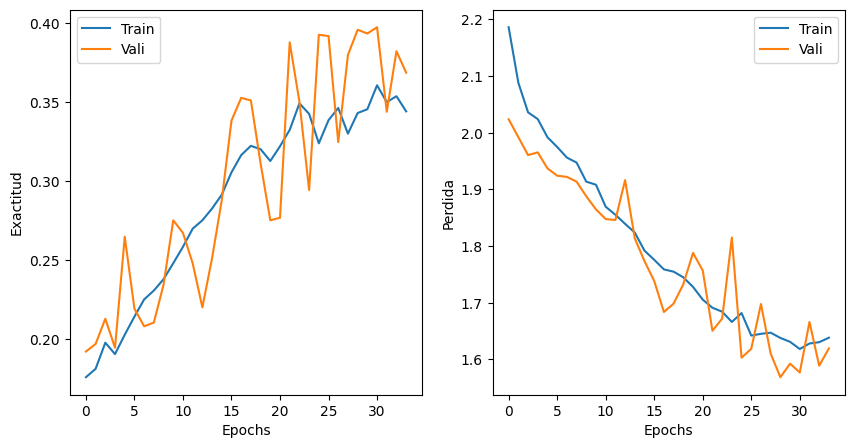

In [ ]:
# Plot training and validation accuracy and loss across epochs

plt.figure(figsize=(10, 5))  # Create a wide figure with 2 side-by-side subplots

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(exa, label='Train')       # Training accuracy
plt.plot(exa_val, label='Vali')    # Validation accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train')      # Training loss
plt.plot(loss_val, label='Vali')   # Validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Display both plots
plt.show()


<!-- # Train with K-fold -->

In [ ]:
# k = 5
# kfold = StratifiedKFold(n_splits = k, shuffle = True, random_state = 31)
# early_stopping = EarlyStopping(monitor='val_loss', patience = 4, restore_best_weights = True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 3, min_lr = 1e-6)

In [ ]:
# historiales = []

In [ ]:
# j=0
# for train, vali in kfold.split(X_data,Y_data):

#   root_save = os.path.join(root_CNN,f'Model{j}.keras')
#   model_checkpoint = ModelCheckpoint(root_save, monitor='val_loss', save_best_only=True,
#                                     save_weights_only=False,mode='min',verbose=2)

#   x_train, x_vali = X_data[train], X_data[vali]
#   y_train, y_vali = Y_data[train], Y_data[vali]

#   x_train = reconverter(x_train)
#   x_train = x_train.reshape(-1,size_img,size_img,colors_canals)

#   x_vali = reconverter(x_vali)
#   x_vali = x_vali.reshape(-1,size_img,size_img,colors_canals)




#   modelo = create_model(input_shape = sample_data .shape,num_classes = classes)

#   history = modelo.fit(x_train, y_train, epochs=15,batch_size=32,
#                validation_data=(x_vali, y_vali),
#                callbacks=[early_stopping,model_checkpoint,reduce_lr])

#   x_train, x_vali = None,None
#   historiales.append(history)
#   j+=1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1655 - loss: 2.2177
Epoch 1: val_loss improved from inf to 2.00304, saving model to /content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Model0.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 349s 3s/step - accuracy: 0.1656 - loss: 2.2172 - val_accuracy: 0.1960 - val_loss: 2.0030 - learning_rate: 0.0010
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1776 - loss: 2.0581
Epoch 2: val_loss improved from 2.00304 to 1.98493, saving model to /content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Model0.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 368s 3s/step - accuracy: 0.1777 - loss: 2.0581 - val_accuracy: 0.1970 - val_loss: 1.9849 - learning_rate: 0.0010
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2009 - loss: 2.0071
Epoch 3: val_loss improved from 1.98493 to 1.96506, saving model to /content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Model0.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1846 - loss: 2.2085
Epoch 1: val_loss improved from inf to 2.01063, saving model to /content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Model1.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.1845 - loss: 2.2080 - val_accuracy: 0.1970 - val_loss: 2.0106 - learning_rate: 0.0010
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1917 - loss: 2.0643
Epoch 2: val_loss improved from 2.01063 to 1.96366, saving model to /content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Model1.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 385s 3s/step - accuracy: 0.1916 - loss: 2.0642 - val_accuracy: 0.1970 - val_loss: 1.9637 - learning_rate: 0.0010
Epoch 3/15
 87/125 ━━━━━━━━━━━━━━━━━━━━ 1:26 2s/step - accuracy: 0.1991 - loss: 2.0304

In [ ]:
DF_historiales = pd.DataFrame(historiales)